In [1]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [16]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [17]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [18]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [22]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  """
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [23]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, 
                             y_train,
                             validation_split=0.33,
                             batch_size = 10, 
                             nb_epoch = 100)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 461us/step - loss: 0.5844 - accuracy: 0.7475 - val_loss: 0.5259 - val_accuracy: 0.7925
Epoch 2/100
5359/5359 [==============================] - 2s 439us/step - loss: 0.5001 - accuracy: 0.7949 - val_loss: 0.4801 - val_accuracy: 0.7952
Epoch 3/100
5359/5359 [==============================] - 2s 353us/step - loss: 0.4642 - accuracy: 0.7962 - val_loss: 0.4551 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 2s 404us/step - loss: 0.4439 - accuracy: 0.7962 - val_loss: 0.4397 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 2s 425us/step - loss: 0.4317 - accuracy: 0.7962 - val_loss: 0.4298 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 2s 369us/step - loss: 0.4235 - accuracy: 0.7977 - val_loss: 0.4232 - val_accuracy: 0.7955
Epoch 7/100
5359/5359 [==============================] - 2s 413us/step

5359/5359 [==============================] - 2s 352us/step - loss: 0.3361 - accuracy: 0.8606 - val_loss: 0.3552 - val_accuracy: 0.8569
Epoch 57/100
5359/5359 [==============================] - 2s 333us/step - loss: 0.3359 - accuracy: 0.8600 - val_loss: 0.3549 - val_accuracy: 0.8569
Epoch 58/100
5359/5359 [==============================] - 2s 334us/step - loss: 0.3352 - accuracy: 0.8600 - val_loss: 0.3550 - val_accuracy: 0.8599
Epoch 59/100
5359/5359 [==============================] - 2s 336us/step - loss: 0.3352 - accuracy: 0.8610 - val_loss: 0.3542 - val_accuracy: 0.8599
Epoch 60/100
5359/5359 [==============================] - 2s 334us/step - loss: 0.3347 - accuracy: 0.8600 - val_loss: 0.3545 - val_accuracy: 0.8595
Epoch 61/100
5359/5359 [==============================] - 2s 334us/step - loss: 0.3346 - accuracy: 0.8612 - val_loss: 0.3542 - val_accuracy: 0.8607
Epoch 62/100
5359/5359 [==============================] - 2s 348us/step - loss: 0.3343 - accuracy: 0.8615 - val_loss: 0.3536 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


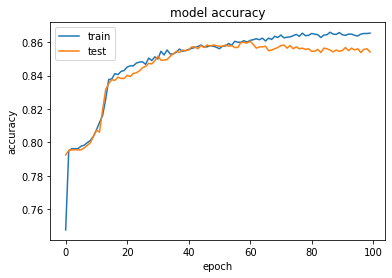

In [26]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

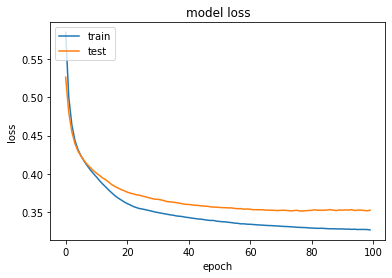

In [27]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1500,   95],
       [ 194,  211]], dtype=int64)

In [33]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8555